# Preamble:

CS390Z - Introduction to Data Mining - Fall 2021

Instructor: Thyago Mota

Description: Program 02

Author: Brandon Young

Description: This program is meant to demonstrate a method of creating classification models to predict the genre of a song baseed on given data.

# Introduction:

In this program, I intend to use the data provided from Kaggle in order to predict a song's genre using three different classification models; specifically, the goal is to use a decision tree, Bayes Classification, and ANN.

# Dataset:

The dataset in this instance is a CSV file that has been collected from Kaggle showing a list of songs and their genre. The CSV file consists of 42,305 songs with different genres and displays multiple attributes quantified in numbers. Among these are danceabiliyt, energy, key, loudness, speechiness, acousticness, instramentalness, liveness, valence, tempo, and duration_ms. There are other bits of information such as the ID, song name, and other unique identifiers. The most valuable assets in this case are as follows:

### Acousticness: (number(float))
    The confidence measure from 0.0 to 1.0. 1.0 represents high confidence the track is acoustic.
    
### Danceability: (number(float))
    Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
    
### Duration_ms: (integer)
    Duration in milliseconds.
    
### Energy: (number(float))
    Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
    
### Instrumentalness: (number(float))
    Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
    
### Liveness: (number(float))
    Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
    
### Loudness: (number(float))
    The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
    
### Mode: (integer)
    Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
    
### Speechiness: (number(float))
    Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
    
### Tempo: (number(float))
    The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
    
### Time_signature: (integer)
    An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
    
### Valence: (number(float))
    A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


# Preprocessing:

In [6]:
from bs4 import BeautifulSoup
import pandas as pd
import csv, os, math, sys, re, random
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier



DATA_FOLDER = '../data'
CSV_FILE_NAME = 'C:/Users/brand/Documents/HW Folder/Data Mining/prg02_songs_classifier/data/genres_v2.csv'

csv_reader = csv.reader(CSV_FILE_NAME)
df = pd.read_table(CSV_FILE_NAME, delimiter = ",")
random.seed(0)


print(CSV_FILE_NAME)
display(df)

C:/Users/brand/Documents/HW Folder/Data Mining/prg02_songs_classifier/data/genres_v2.csv


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


This section is used to import the resources needed to read the CSV files as well as prepare for the use of the decision tree and other functions.

In [7]:
dataset = pd.read_csv(CSV_FILE_NAME, low_memory=False)
dataset.shape
# This should show the shape of the rows and columns
dataset.head()

X = dataset.drop(['Unnamed: 0', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'title', 'genre'], axis=1)

#Dropping several columns that aren't useful here

y = dataset['genre']

For the dataset, what we aim to do is drop all of the columns that don't allow us to predict any sort of data. This includes the empty columns and columns such as song names and so on.

We intentionally set the y value to be genre as this is what we want to predict in this case.

# Summary Statistics:

In [8]:
#print(dataset[['danceability','genre']].groupby('genre').describe())
#print(dataset[['energy','genre']].groupby('genre').describe())
#print(summary)
#print(df['genre'].unique())

#danceTest = df[['danceability','genre']].groupby('genre')
#print(danceTest) this fookin works
#danceTest.plot(y='danceability', x='genre',kind='box')
#danceTest.plot(x='genre', y='danceability', kind='hist')
#dataset.plot(x='genre', y='danceability',kind='hist')
#danceTest.plot(x='genre',y='danceability',kind='box')
#plt.hist()

X.describe()
#dataset.plot(kind='hist')
#plt.show()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000


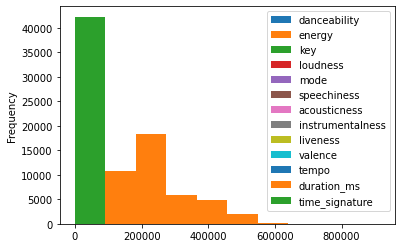

In [9]:
X.plot(kind='hist')
plt.show()

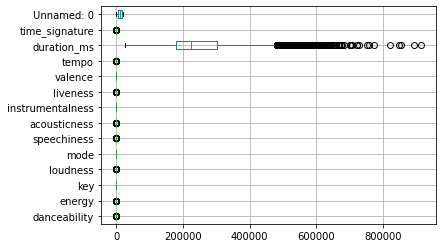

In [59]:
# bp = plt.boxplot(,vert=False)
dataset.boxplot(vert=False)
plt.show()

<AxesSubplot:title={'center':'danceability'}, xlabel='genre'>

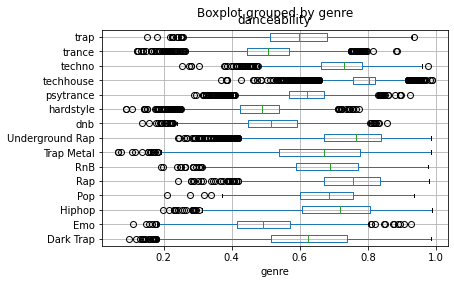

In [46]:
dataset.boxplot(column='danceability', by='genre',vert=False)

<AxesSubplot:title={'center':'energy'}, xlabel='genre'>

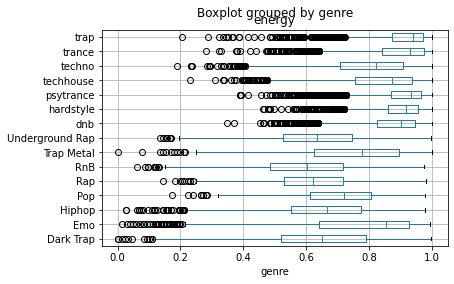

In [48]:
dataset.boxplot(column='energy',vert=False,by='genre')

<AxesSubplot:title={'center':'key'}, xlabel='genre'>

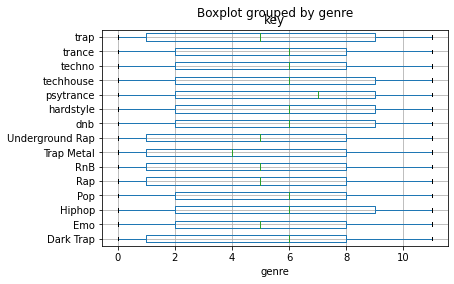

In [47]:
dataset.boxplot(column='key',vert=False,by='genre')

<AxesSubplot:title={'center':'loudness'}, xlabel='genre'>

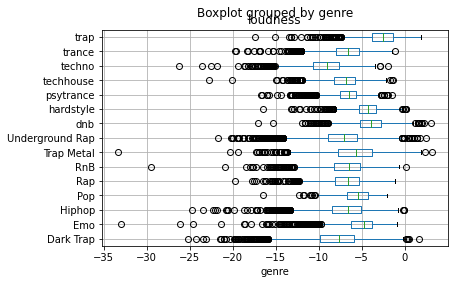

In [49]:
dataset.boxplot(column='loudness',vert=False,by='genre')

<AxesSubplot:title={'center':'mode'}, xlabel='genre'>

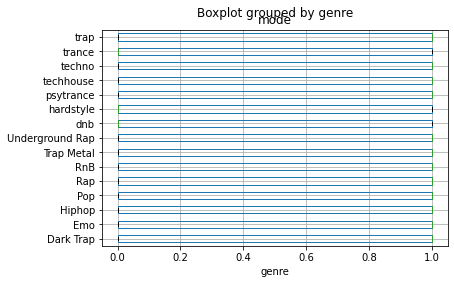

In [50]:
dataset.boxplot(column='mode',vert=False,by='genre')

<AxesSubplot:title={'center':'speechiness'}, xlabel='genre'>

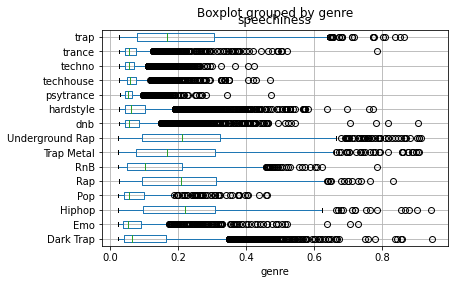

In [51]:
dataset.boxplot(column='speechiness',vert=False,by='genre')

<AxesSubplot:title={'center':'acousticness'}, xlabel='genre'>

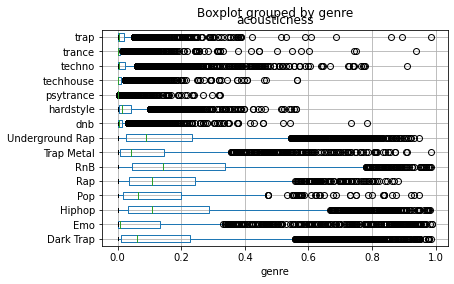

In [52]:
dataset.boxplot(column='acousticness',vert=False,by='genre')

<AxesSubplot:title={'center':'instrumentalness'}, xlabel='genre'>

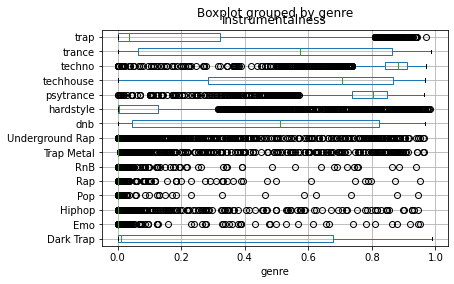

In [53]:
dataset.boxplot(column='instrumentalness',vert=False,by='genre')

<AxesSubplot:title={'center':'liveness'}, xlabel='genre'>

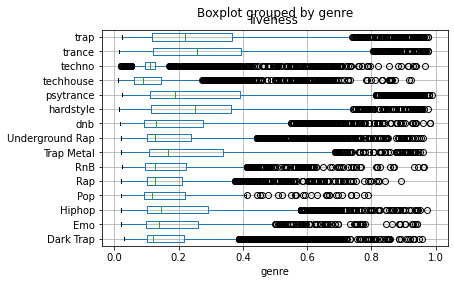

In [54]:
dataset.boxplot(column='liveness',vert=False,by='genre')

<AxesSubplot:title={'center':'valence'}, xlabel='genre'>

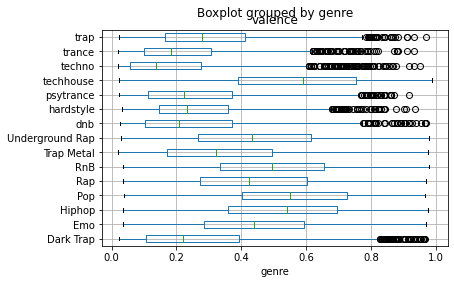

In [55]:
dataset.boxplot(column='valence',vert=False,by='genre')

<AxesSubplot:title={'center':'tempo'}, xlabel='genre'>

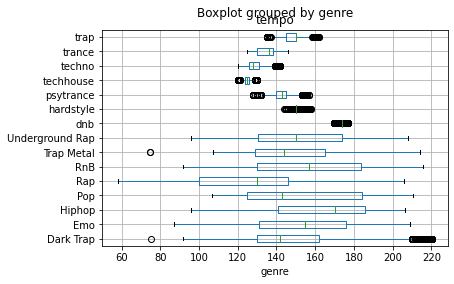

In [56]:
dataset.boxplot(column='tempo',vert=False,by='genre')

<AxesSubplot:title={'center':'duration_ms'}, xlabel='genre'>

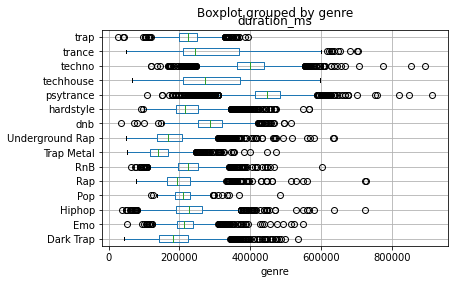

In [57]:
dataset.boxplot(column='duration_ms',vert=False,by='genre')

<AxesSubplot:title={'center':'time_signature'}, xlabel='genre'>

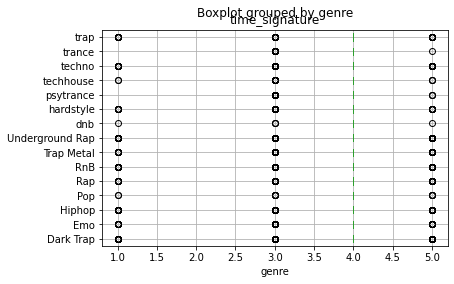

In [58]:
dataset.boxplot(column='time_signature',vert=False,by='genre')

<AxesSubplot:title={'center':'mode'}, xlabel='genre'>

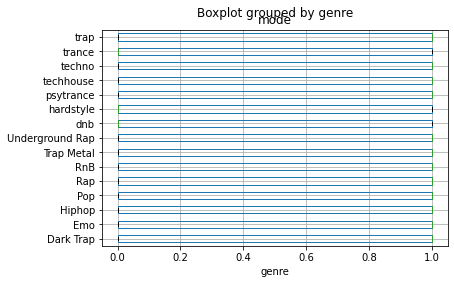

In [60]:
dataset.boxplot(column='mode',vert=False,by='genre')

# Classification Models:

Decision Tree Inference:

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=0)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
print(y_predict)

[[365  18  41   9  36  28 118 175  15  19   6  17  15  40  40]
 [ 21 158  17   7   3  26  13  17   9  12   0   1   0   4   9]
 [ 69  20 188  16  45  87  16 162   6   2   0   3   0   3   4]
 [  6  19  10   4   3  20   1   9   0   1   0   6   0   4   1]
 [ 33   5  45   4 142  32  14  92   0   0   0   3   0   0   1]
 [ 44  33 100  19  36 126  12  69   2   2   0   2   0   3   4]
 [137  10  13   6   7   8  72 117   2   6   0   1   0   6   9]
 [273  24 212  15 128  49 146 322   2   3   0   8   1   5   9]
 [  9   7   3   1   2   3   1   2 545   0   0   0   0   0   0]
 [ 12   9   1   0   0   1   4   4   1 489   7   0   0   0  48]
 [  6   0   1   1   1   0   1   1   0  10 509   1  17  47   5]
 [ 14   5   1   2   0   4   4   3   0   0   3 489  61  10   0]
 [  6   0   0   0   0   0   1   1   0   0  27  45 456  32   1]
 [ 45   6   2   1   2   1   4   1   0   2  28   5  26 457   8]
 [ 37  13  12   0   2   2  17   8   0  54   2   0   0   6 448]]
                 precision    recall  f1-score   suppo

Bayes Classification:

In [13]:
rows_train = random.sample(range(len(dataset)),k=int(len(dataset)*.2))

df_train = pd.DataFrame(columns = dataset.columns)
df_test = pd.DataFrame(columns = dataset.columns)
for i, row dataset.iterrows():
    df_train = dftrain.append(row)
else:
    df_test = df_test.append(row)

IndentationError: unexpected indent (Temp/ipykernel_26364/2611342337.py, line 5)

ANN:

In [13]:
df_train, df_test = train_test_split(X, test_size=0.2, random_state=0)

# X is actually the filtered dataset

min_max_scaler = preprocessing.MinMaxScaler()

X_train = min_max_scaler.fit_transform(df_train.iloc[:,:-1].values)
X_test = min_max_scaler.fit_transform(df_test.iloc[:,:-1].values)

Y_train = df_train.iloc[:,-1].values
Y_test = df_test.iloc[:,-1].values

classify = MLPClassifier(hidden_layer_sizes=(2,4), max_iter=100, random_state=0)

classify.fit(X_train,Y_train)


print("Accuracy:")
print(classify.score(X_test,Y_test))

testA = min_max_scaler.fit_transform(X.iloc[:,:-1].values)
testB = X.iloc[:,-1].values

clf = MLPClassifier(hidden_layer_sizes=(2,4), max_iter=100, random_state=0)
clf.fit(testA,testB)

print("Accuracy:", clf.score(testA,testB))

Accuracy:
0.9582791632194776
Accuracy: 0.9556080841508096
